# Classification for Breast Cancer Dataset

We are predicting whether cancer will reoccur or not using 10 categorical variables.

Dataset is from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer

The description of the dataset is at: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.names 

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
def read_file_cancer(filename):
    line_count = 0
    file_read = open(filename,"r")
    file_write = open("breast-cancer-modified.csv","w")
    for line in iter(file_read):
        line_no_newline = line.rstrip()
        line_split = line_no_newline.split(",")
        if "?" in line_split:
            line_count += 1
            print("Bad line number:",line_count)
            continue  
        else:
            line_count += 1
            file_write.write(line)
    file_read.close()
    file_write.close()
    return

In [24]:
read_file_cancer("breast-cancer.data.csv")

Bad line number: 146
Bad line number: 164
Bad line number: 165
Bad line number: 184
Bad line number: 185
Bad line number: 207
Bad line number: 234
Bad line number: 264
Bad line number: 265


After cleaning the dataset, there are 277 rows.  The reoccurence of cancer is the value we are trying to predict.  There are 10 features -- age, menopause status, tumor size, inv_nodes, node_caps, deg_malig, left/right breast, quadrant of the breast, irradiation status.

In [44]:
df = pd.read_csv('breast-cancer-modified.csv') # 
print("Dataframe shape: ",df.shape,"\n") # 
print(df.head())

Dataframe shape:  (277, 10) 

                  Class    age menopause tumor-size inv-nodes node-caps  \
0  no-recurrence-events  30-39   premeno      30-34       0-2        no   
1  no-recurrence-events  40-49   premeno      20-24       0-2        no   
2  no-recurrence-events  40-49   premeno      20-24       0-2        no   
3  no-recurrence-events  60-69      ge40      15-19       0-2        no   
4  no-recurrence-events  40-49   premeno        0-4       0-2        no   

   deg-malig breast breast-quad irradiat  
0          3   left    left_low       no  
1          2  right    right_up       no  
2          2   left    left_low       no  
3          2  right     left_up       no  
4          2  right   right_low       no  


In [45]:
df['Class'].unique()

array(['no-recurrence-events', 'recurrence-events'], dtype=object)

In [46]:
s = pd.Categorical(df['age'], categories=["10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99"])

In [47]:
df['Class'] = pd.Categorical(df['Class'], categories=['no-recurrence-events', 'recurrence-events'], ordered=True)

In [48]:
# df['age'] = df['age'].astype('category')
df['age'] = pd.Categorical(df['age'], categories=["10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99"])
# ser.astype('category', ordered=True, categories=["10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99"])


In [49]:
df['menopause'] = pd.Categorical(df['menopause'], categories=["lt40", "ge40", "premeno"])

In [50]:
df['tumor-size'] = pd.Categorical(df['tumor-size'], categories=["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44",
                  "45-49", "50-54", "55-59"])

In [51]:
df['inv-nodes'] = pd.Categorical(df['inv-nodes'],categories=["0-2", "3-5", "6-8", "9-11", "12-14", "15-17", "18-20", "21-23", "24-26",
                 "27-29", "30-32", "33-35", "36-39"])

In [52]:
df['node-caps'] = pd.Categorical(df['node-caps'], categories=["yes", "no"])

In [53]:
df['deg-malig'] = pd.Categorical(df['deg-malig'], categories=[1, 2, 3])


In [54]:
df['deg-malig']

0      3
1      2
2      2
3      2
4      2
5      2
6      2
7      1
8      2
9      2
10     3
11     2
12     1
13     3
14     3
15     1
16     2
17     3
18     3
19     1
20     2
21     2
22     2
23     2
24     2
25     2
26     1
27     3
28     2
29     2
      ..
247    3
248    3
249    1
250    2
251    2
252    3
253    2
254    3
255    3
256    3
257    2
258    3
259    3
260    2
261    3
262    3
263    3
264    2
265    2
266    3
267    3
268    3
269    3
270    3
271    3
272    2
273    3
274    1
275    3
276    3
Name: deg-malig, Length: 277, dtype: category
Categories (3, int64): [1, 2, 3]

In [55]:
df['breast'] = pd.Categorical(df['breast'], categories=["left", "right"])

In [56]:
df['breast-quad'].unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central'], dtype=object)

In [57]:
df['breast-quad'] = pd.Categorical(df['breast-quad'], categories=["left_up", "left_low", "right_up","right_low","central"])

In [58]:
df['irradiat'] = pd.Categorical(df['irradiat'], categories=["yes", "no"])

In [59]:
df.dtypes

Class          category
age            category
menopause      category
tumor-size     category
inv-nodes      category
node-caps      category
deg-malig      category
breast         category
breast-quad    category
irradiat       category
dtype: object

In [60]:
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [61]:
df.describe()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,277,277,277,277,277,277,277,277,277,277
unique,2,6,3,11,7,2,3,2,5,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,2,left,left_low,no
freq,196,91,149,57,209,221,129,145,106,215


In [62]:
df.columns

Index(['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

In [63]:
X2 = ['age', 'menopause', 'tumor-size', 'inv-nodes', 
       'deg-malig', 'breast', 'breast-quad', 'node-caps','irradiat']
y2 =["Class"]

In [64]:
X2

['age',
 'menopause',
 'tumor-size',
 'inv-nodes',
 'deg-malig',
 'breast',
 'breast-quad',
 'node-caps',
 'irradiat']

In [65]:
y2 

['Class']

In [66]:
# The following two are equivalent
df.loc[:, y2]
df_Y = df[y2]

In [67]:
df_Y = df[y2]
df_X = df.loc[:, X2]

In [240]:
# dataset = np.array('breast-cancer-modified.data.csv')


In [ ]:
# le = preprocessing.LabelEncoder()
# X2 = df_X.apply(le.fit_transform)
# X2

In [ ]:
# Y2= df_Y.apply(le.fit_transform)
# Y2

We use encoding for nominal data. We create a column for each value and use values 0, 1 etc. to denote expression of each value.

In [68]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.select_dtypes(exclude=['number']) \
                .apply(LabelEncoder().fit_transform)
df_encoded.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,1,2,5,0,0,2,0,1,0
1,0,2,2,3,0,0,1,1,4,0
2,0,2,2,3,0,0,1,0,1,0
3,0,4,0,2,0,0,1,1,2,0
4,0,2,2,0,0,0,1,1,3,0


In [69]:
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [70]:
df_Y = df_encoded[y2]
df_X = df_encoded.loc[:, X2]

In [71]:
df_Y.shape

(277, 1)

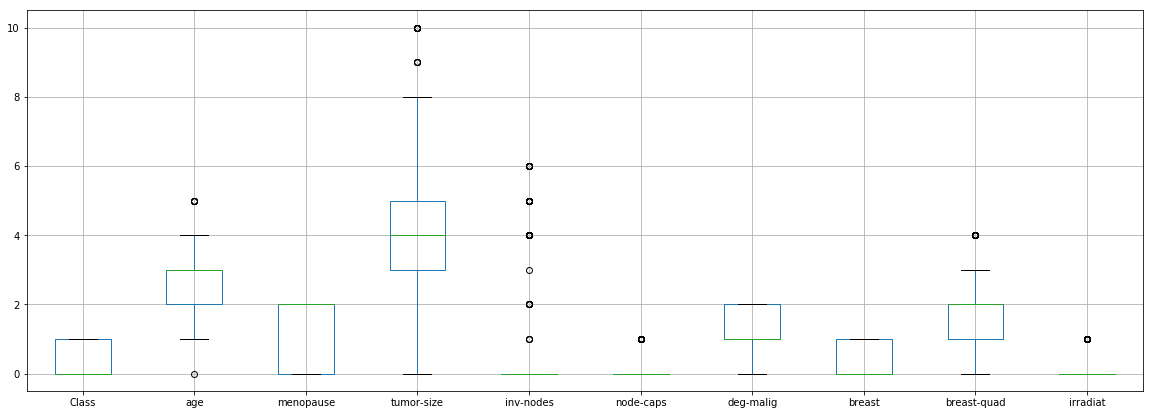

In [72]:
fig = plt.figure(figsize = (20,7))
df_encoded.boxplot()

In [73]:
import matplotlib.pyplot as plt

df_encoded.corr()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
Class,1.000000,-0.086981,0.059512,0.143968,0.325523,0.289002,0.330253,-0.041304,0.059788,0.226020
age,-0.086981,1.000000,-0.717573,-0.008578,-0.089014,-0.044446,-0.065260,-0.041744,-0.036234,-0.075946
menopause,0.059512,-0.717573,1.000000,-0.003001,0.020757,0.025001,-0.047721,0.055761,0.075289,0.071825
tumor-size,0.143968,-0.008578,-0.003001,1.000000,0.157523,0.166014,0.152436,0.029738,0.154654,0.166291
inv-nodes,0.325523,-0.089014,0.020757,0.157523,1.000000,0.672745,0.306197,0.031232,0.033165,0.342650
node-caps,0.289002,-0.044446,0.025001,0.166014,0.672745,1.000000,0.330181,-0.012345,0.065050,0.333537
deg-malig,0.330253,-0.065260,-0.047721,0.152436,0.306197,0.330181,1.000000,-0.045874,0.038025,0.230821
breast,-0.041304,-0.041744,0.055761,0.029738,0.031232,-0.012345,-0.045874,1.000000,0.211900,0.025230
breast-quad,0.059788,-0.036234,0.075289,0.154654,0.033165,0.065050,0.038025,0.211900,1.000000,0.017440
irradiat,0.226020,-0.075946,0.071825,0.166291,0.342650,0.333537,0.230821,0.025230,0.017440,1.000000


In [74]:
# Prepare the dataset for classification
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# from sklearn.utils.validation import column_or_1d
# y = column_or_1d(df_Y, warn=True)

# Split data to training and test

# Split X and y into X_train and X_test
df_X_train, df_X_test, df_Y_train, df_Y_test = train_test_split(df_X, df_Y, test_size=0.25, random_state=1)

# Verify that the training and test are as expected.
print("df_X_train shape: ", df_X_train.shape) # 207 rows,7 column
print("df_Y_train shape: ", df_Y_train.shape) # 207 rows, 1 column
print("df_X_testshape: ", df_X_test.shape) # 70 rows, 7 columns
print("df_Y_test shape: ", df_Y_test.shape) # 70rows, 1 column
# print(y_train)


df_X_train shape:  (207, 9)
df_Y_train shape:  (207, 1)
df_X_testshape:  (70, 9)
df_Y_test shape:  (70, 1)


In [75]:
# First classification method:  Logistic Regression

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

model_L = LogisticRegression()


model_L.fit(df_X_train, df_Y_train.values.ravel())

# print(model_L)

# make predictions
expected = df_Y_test
predicted = model_L.predict(df_X_test)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
cm_L = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix: ", cm_L)

             precision    recall  f1-score   support

          0       0.76      0.92      0.83        49
          1       0.64      0.33      0.44        21

avg / total       0.72      0.74      0.71        70

Confusion matrix:  [[45  4]
 [14  7]]


## Bayes Classifier has an accuracy of 79%

In [76]:
## Naive Bayes Classification 
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()

model_naive.fit(df_X_train, df_Y_train.values.ravel())

# print(model_naive)

expected = df_Y_test
predicted = model_naive.predict(df_X_test)

print(metrics.classification_report(expected, predicted))
cm_naive = metrics.confusion_matrix(expected, predicted)
print(cm_naive)
print("Test score for Naive Bayes classifier: ", model_naive.score(df_X_test, df_Y_test))

             precision    recall  f1-score   support

          0       0.84      0.86      0.85        49
          1       0.65      0.62      0.63        21

avg / total       0.78      0.79      0.78        70

[[42  7]
 [ 8 13]]
Test score for Naive Bayes classifier:  0.785714285714


In [77]:
# k-Nearest Neighbor Classification

# First let us check the training error.
from sklearn.neighbors import KNeighborsClassifier

model_Knn= KNeighborsClassifier()

model_Knn.fit(df_X_train,df_Y_train.values.ravel())

expected = df_Y_train
predicted = model_Knn.predict(df_X_train)

print(metrics.classification_report(expected, predicted))
cm_knn_train = metrics.confusion_matrix(expected, predicted)
print(cm_knn_train)

             precision    recall  f1-score   support

          0       0.81      0.95      0.87       147
          1       0.77      0.45      0.57        60

avg / total       0.80      0.80      0.78       207

[[139   8]
 [ 33  27]]


In [78]:
# Knn-classification. Now let us check the accuracy of the model on the test dataset.
from sklearn.neighbors import KNeighborsClassifier

model_Knn= KNeighborsClassifier()

model_Knn.fit(df_X_train,df_Y_train.values.ravel())

print(model_Knn.get_params())

expected = df_Y_test
predicted = model_Knn.predict(df_X_test)

print(metrics.classification_report(expected, predicted))
cm_knn = metrics.confusion_matrix(expected, predicted)
print(cm_knn)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': 1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
             precision    recall  f1-score   support

          0       0.72      0.90      0.80        49
          1       0.44      0.19      0.27        21

avg / total       0.64      0.69      0.64        70

[[44  5]
 [17  4]]


In [79]:
print(model_Knn.get_params())
model_Knn.score(df_X_test, df_Y_test)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': 1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


0.68571428571428572

In [80]:
# Decision Tree Classifier -- Training error
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
le = preprocessing.LabelEncoder()
model_tree.fit(df_X_train,df_Y_train)

# print(model_tree)

# make predictions
expected = df_Y_train
predicted = model_tree.predict(df_X_train)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
cm_tree_train = metrics.confusion_matrix(expected, predicted)
print(cm_tree_train)

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       147
          1       0.98      0.95      0.97        60

avg / total       0.98      0.98      0.98       207

[[146   1]
 [  3  57]]


In [81]:
# Decision Tree Classifier (TEST error)

# make predictions
expected = df_Y_test
predicted = model_tree.predict(df_X_test)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm_tree = metrics.confusion_matrix(expected, predicted)

             precision    recall  f1-score   support

          0       0.73      0.76      0.74        49
          1       0.37      0.33      0.35        21

avg / total       0.62      0.63      0.62        70

[[37 12]
 [14  7]]


In [82]:
def plot_cm(cm):   
    categories = df['Class'].unique()
    df_cm = pd.DataFrame(cm, index=categories, columns=categories)
    fig = plt.figure(figsize=(5,5))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu",linecolor="blue",linewidths=1.0)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Conclusion 

Naive Bayes gives the highest prediction accuracy of 79%.  The confusion matrix is shown below.

 

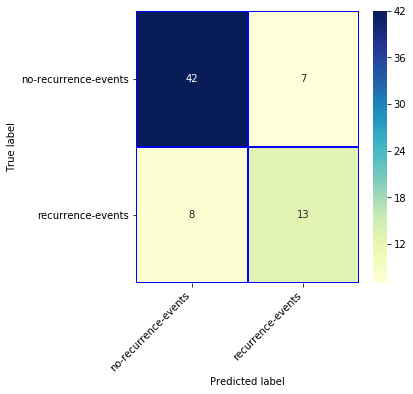

In [83]:
plot_cm(cm_naive)

We will next use cross validation to improve the prediction of the classifier.

In [84]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

model_naive_cv = GaussianNB()
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(model_naive_cv, df_X, df_Y.values.ravel(), scoring = scoring, cv= 5, return_train_score=False)
sorted(scores.keys())
print("Recall: ", scores['test_recall_macro'])
print("Precision: ", scores['test_precision_macro'])

Recall:  [ 0.5         0.71875     0.8125      0.58173077  0.60416667]
Precision:  [ 0.35087719  0.90625     0.93333333  0.56746032  0.60833333]


/Users/balaji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#Finding the optimum number of clusters for k-means classification
# n_clusters = Number of centroids to generate
# init = k-means++ = select convergence method
# max_iter = Maximum number of iterations of the k-means algorithm for a single run.
# n_init = 10 = Number of time the k-means algorithm will be run with different centroid seeds. 
# random_state = 0 = random number generator is the RandomState instance used by np.random
# inertia = Sum of squared distances of samples to their closest cluster center
# WCSS = Witchin cluster sum of squares
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 15, random_state = 0)
    kmeans.fit(df_X_test)
    wcss.append(kmeans.inertia_)# within clusters sum of squares (dist from centroid and then square it and then add it)
    print(i,kmeans.inertia_)

1 935.114285714
2 659.678135405
3 470.806365361
4 378.090408577
5 333.261186526
6 303.419047619
7 274.793772894
8 246.559157509
9 229.326373626
10 217.31043956
11 198.78452381
12 185.263888889
13 175.747619048
14 161.947222222


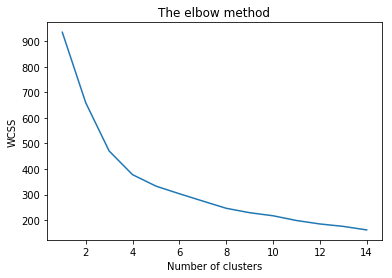

In [113]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [138]:
# best_n_clusters = 2
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 100, n_init = 15, random_state = 0)
kmeans.fit(df_X_test)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=15, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [139]:
print(kmeans.cluster_centers_) 

[[  2.69811321e+00   1.03773585e+00   4.09433962e+00  -1.55431223e-15
    8.86792453e-01   4.52830189e-01   1.81132075e+00   7.54716981e-02
    1.13207547e-01]
 [  2.82352941e+00   9.41176471e-01   4.82352941e+00   4.47058824e+00
    1.52941176e+00   4.70588235e-01   1.64705882e+00   6.47058824e-01
    4.11764706e-01]]


In [140]:
print(kmeans.labels_) #

[1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0]


In [142]:
from sklearn import metrics
print(metrics.classification_report(df_Y_test, kmeans.labels_))

             precision    recall  f1-score   support

          0       0.81      0.88      0.84        49
          1       0.65      0.52      0.58        21

avg / total       0.76      0.77      0.76        70



## Conclusion
with Knn it has 2 type of clusters which is reoccurence of cancer or not. This  clustering types are similar to the type given in the dataset.